Utilizar os dados dos emprestimos de livros para identificar a quais cursos pertencem os alunos que mais utilizam do serviço de emprestimo da biblioteca

In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lendo os dados dos emprestimos
Dados_Emprestimos = glob("Dados_Abertos/Dados_Emprestimos/*.csv")
emprestimos = [pd.read_csv(f, sep=';') for f in sorted(Dados_Emprestimos)]
Dados_Emprestimos

['Dados_Abertos/Dados_Emprestimos/emprestimos-20161.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20031.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20151.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20061.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20171.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20121.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20042.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20131.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20062.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20172.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20141.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20071.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20051.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20122.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20162.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20142.csv',
 'Dados_Abertos/Dados_Emprestimos/emprestimos-20102.csv',
 'Dados_Aberto

In [3]:
# Lendo os dados do acervo da biblioteca
Dados_Discentes = glob("Dados_Abertos/Dados_Discentes/*.csv")
discentes = [pd.read_csv(f, sep=';') for f in sorted(Dados_Discentes)]
Dados_Discentes

['Dados_Abertos/Dados_Discentes/discentes-2019.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2018.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2013.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2010.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2014.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2016.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2017.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2011.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2009.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2015.csv',
 'Dados_Abertos/Dados_Discentes/discentes-2012.csv']

In [4]:
# Lendo os dados dos discentes
acervo = pd.read_csv("Dados_Abertos/Dados_Biblioteca/acervo.csv", sep=';')
exemplares = pd.read_csv("Dados_Abertos/Dados_Biblioteca/exemplares.csv", sep=';')
exemplares_acervo = pd.read_csv("Dados_Abertos/Dados_Biblioteca/exemplares-acervo.csv", sep=';')

In [5]:
# Adicionando coluna 'ano' aos datasets 
so = sorted(Dados_Emprestimos)
for r in range(len(so)):
    emprestimos[r]['ano'] = int(so[r][-9:-5])
    
anos = []
for r in range(len(so)):
    anos.append(int(so[r][-9:-5]))

In [6]:
# Concatenando os datasets obtidos
emprestimos_all = pd.concat(emprestimos, ignore_index=True)
discentes_all = pd.concat(discentes, ignore_index=True)

# Filtrando dados a serem considerados
emprestimos_all = emprestimos_all[emprestimos_all.nome_usuario != "Usuário de Migração"]
discentes_curso = discentes_all[['nome_discente','ano_ingresso','nome_curso', 'nivel_ensino']]
discentes_curso = discentes_curso.set_index(['nome_discente','ano_ingresso'])

In [7]:
# Obtendo o numero de emprestimos de cada usuario por ano
usuarios = emprestimos_all.groupby(['nome_usuario','ano'])['id_emprestimo'].count()
# Limpando o nome de dois usuarios
usuarios.index = usuarios.index.set_levels(usuarios.index.unique(level=0).str.replace('\t', ''), level=0)
usuarios = usuarios.sort_index()
# Melhorando a Visualização
usuarios = pd.DataFrame(usuarios)
usuarios.columns = ['emprestimos']

In [8]:
# Preparando para o Merge
discentes_curso.index.levels[0].name = "nome"
discentes_curso.index.levels[1].name = "ano"
usuarios.index.levels[0].name = "nome"
usuarios.index.levels[1].name = "ano"

In [9]:
emprestimos_curso = pd.merge(discentes_curso, usuarios, left_index=True, right_index=True)

In [10]:
# Organizando por nivel de ensino
niveis_ensino = emprestimos_curso.nivel_ensino.unique()
emprestimos_curso_niveis = {nivel: emprestimos_curso[emprestimos_curso.nivel_ensino == nivel] for nivel in niveis_ensino}
emprestimos_curso_niveis = {nivel: pd.DataFrame(emprestimos_curso_niveis[nivel].groupby(['nome_curso'])['emprestimos'].sum()).sort_values(by='emprestimos', ascending=False) for nivel in niveis_ensino}
niveis_ensino

array(['GRADUAÇÃO', 'TÉCNICO', 'MESTRADO', 'DOUTORADO', 'LATO SENSU',
       'FORMAÇÃO COMPLEMENTAR', 'RESIDÊNCIA', 'TÉCNICO INTEGRADO',
       'FUNDAMENTAL', 'INFANTIL', 'MÉDIO'], dtype=object)

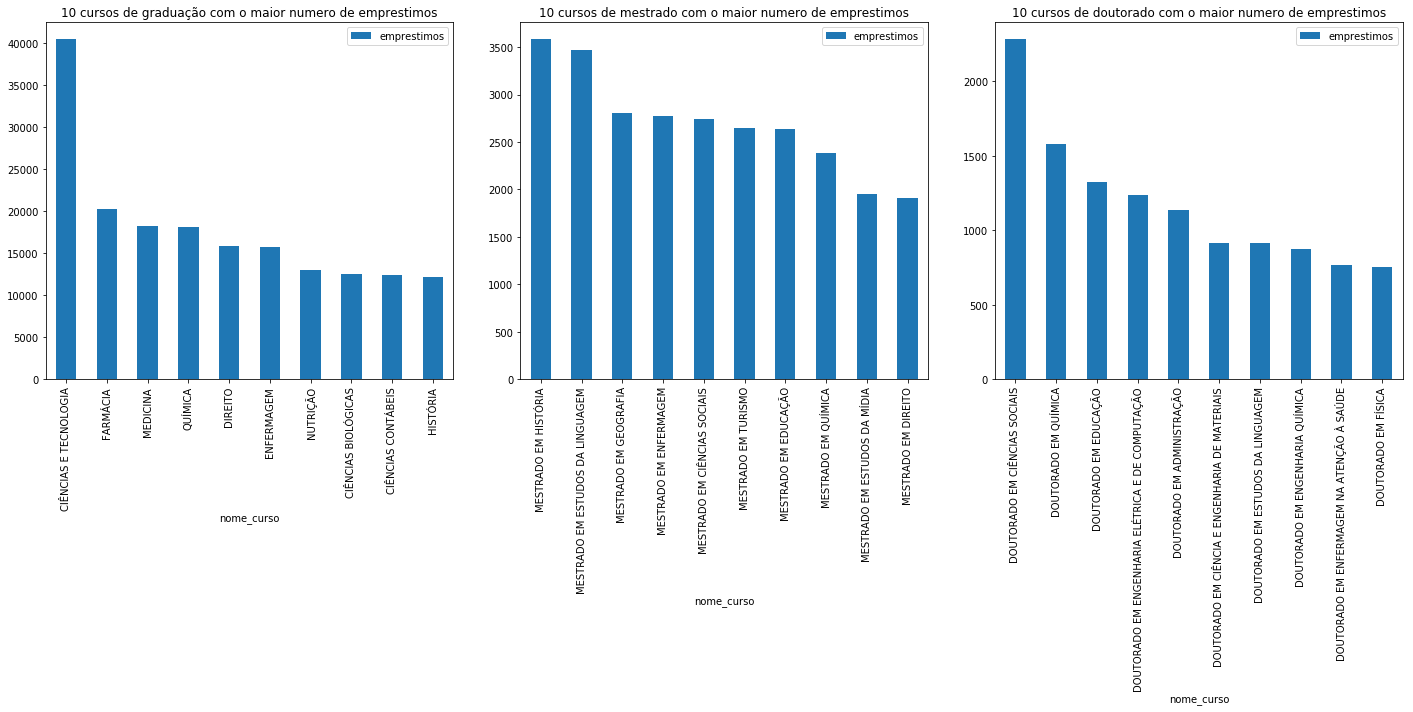

In [11]:
# Preparando Gráficos para os niveis comuns de ensino
niveis_ensino_padrao = ["GRADUAÇÃO", "MESTRADO", "DOUTORADO"]

fig, axes = plt.subplots(figsize=(20, 10),nrows=1, ncols=3)

generic_title = "10 cursos de %s com o maior numero de emprestimos"

for i in range(len(niveis_ensino_padrao)):
    emprestimos_curso_niveis[niveis_ensino_padrao[i]].head(10).plot.bar(title=generic_title % niveis_ensino_padrao[i].lower(), ax=axes[i])

plt.tight_layout()
plt.show()

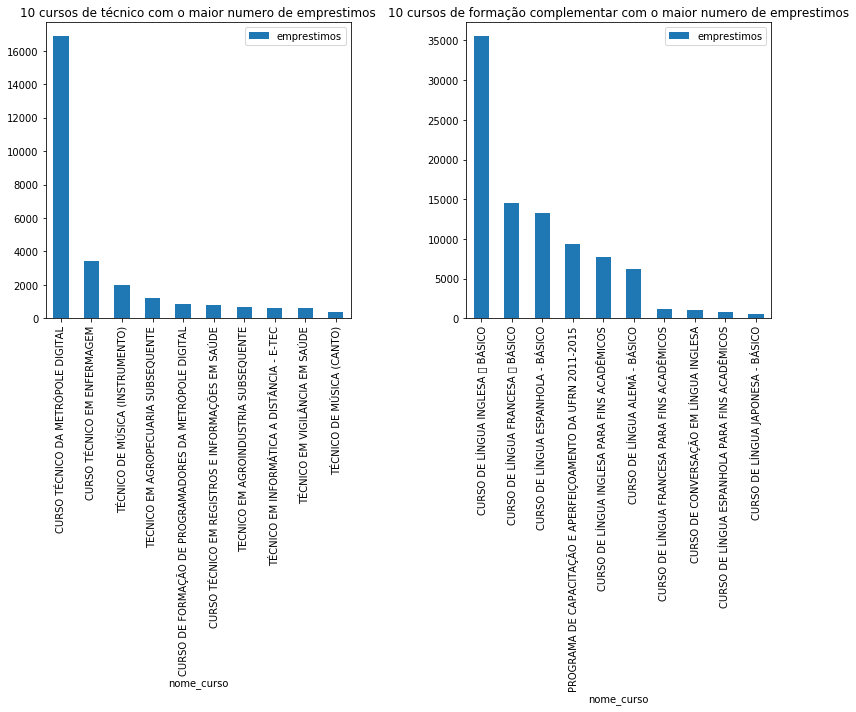

In [12]:
# Preparando Gráficos para os outros niveis de ensino
niveis_ensino_outros = ["TÉCNICO","FORMAÇÃO COMPLEMENTAR"]

fig, axes = plt.subplots(figsize=(12, 10),nrows=1, ncols=2)

for i in range(len(niveis_ensino_outros)):
    emprestimos_curso_niveis[niveis_ensino_outros[i]].head(10).plot.bar(title=generic_title % niveis_ensino_outros[i].lower(), ax=axes[i])
    
plt.tight_layout()
plt.show()

In [13]:
# Contabilizando numero de emprestimos por ano
emprestimos_ano = emprestimos_all.groupby(["ano"])["id_emprestimo"].count()
emprestimos_ano = pd.DataFrame(emprestimos_ano)

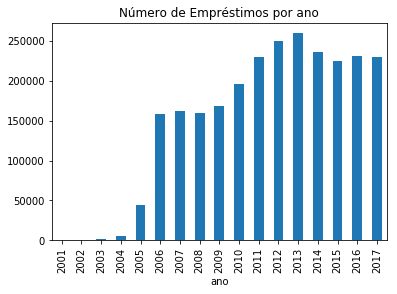

In [14]:
emprestimos_ano.plot(kind='bar', title="Número de Empréstimos por ano", legend=False)

In [15]:
emprestimos_all.columns

Index(['id_emprestimo', 'codigo_barras', 'data_renovacao', 'data_emprestimo',
       'data_devolucao', 'nome_usuario', 'id_vinculo_usuario',
       'tipo_vinculo_usuario', 'ano'],
      dtype='object')

In [88]:
codigos_livros_emprestados = emprestimos_all.codigo_barras.value_counts()
codigos_livros_emprestados = pd.DataFrame(codigos_livros_emprestados)
codigos_livros_emprestados = codigos_livros_emprestados.reset_index()
codigos_livros_emprestados.columns = ["codigo_barras", "count"]

In [95]:
codigos_livros_emprestados

,codigo_barras,count
0,2006039067,237
1,X007747,209
2,L184372,166
3,X007959,165
4,X007748,162
5,L178151,157
6,2010091988,156
7,L178114,152
8,L184385,152
9,X007884,150


In [75]:
bib_ex = exemplares[["registro_sistema", "codigo_barras", "localizacao"]]
exe_acer = exemplares_acervo[["registro_sistema", "titulo", "sub_titulo", "assunto", "autor", "isbn"]]

In [76]:
biblio_merged = pd.merge(bib_ex, exe_acer, on="registro_sistema", how='outer')

In [77]:
biblio_merged = biblio_merged.drop_duplicates(subset="codigo_barras")

In [96]:
biblio_merged_counted = pd.merge(codigos_livros_emprestados, biblio_merged, on="codigo_barras")

In [116]:
droped = biblio_merged_counted.dropna(subset=['assunto'])

In [119]:
calculo = droped[droped.assunto.str.contains("alculo")]

In [120]:
calculo

,codigo_barras,count,registro_sistema,localizacao,titulo,sub_titulo,assunto,autor,isbn
2565,2006019229,69,76545,517.2/.3 R571c v.2,Cálculo diferencial e integral /,NaN,Cálculo diferencial.#$&Calculo integral.,"Righetto, Armando,",NaN
3462,2009038171,64,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
4026,2013011033,61,190274,514.12 W784v,Vetores e geometria analítica /,NaN,Geometria analítica.#$&Calculo vetorial.#$&Álg...,"Winterle, Paulo",9788534611091 (broch.)
4325,2009040689,60,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
4796,2009040684,58,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
6327,2009040674,53,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
6444,2006018670,53,75677,517.2/.3 R571c 2.ed.,Cálculo diferencial e integral /,NaN,Cálculo diferencial.#$&Calculo integral.,"Righetto, Armando,",NaN
6490,2013011034,52,190274,514.12 W784v,Vetores e geometria analítica /,NaN,Geometria analítica.#$&Calculo vetorial.#$&Álg...,"Winterle, Paulo",9788534611091 (broch.)
6570,2009040678,52,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
6591,2009040688,52,91594,517.2/.3 A958c 7.ed. v.1,Cálculo das funções de uma variável /,NaN,Cálculo.#$&Funções (Matemática).#$&Cálculo dif...,"Avila, Geraldo.",8521613709 (broch.)#$&9788521613701 (broch.)#$...
